In [17]:
import sys
# This is done to add "grammy" module to path
sys.path.append("../")

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from grammy.billboard import get_filename_billboard_data_all_years
from grammy.defines import CSV_QUOTE, CSV_SEP
from grammy.grammy import get_filename_grammy_albums_of_the_year
from grammy.metacritic import get_filename_metacritic_grammy_info, get_filename_metacritic_data_all_years

sns.set_theme(style="whitegrid")

# Data loading/treatment

In [19]:
grammy_albums_of_the_year_path = get_filename_grammy_albums_of_the_year("csv")
grammy_albums_of_the_year = pd.read_csv(
    grammy_albums_of_the_year_path, encoding="utf-8", sep=CSV_SEP, quotechar=CSV_QUOTE
)
grammy_albums_of_the_year["album"] = grammy_albums_of_the_year["album"].str.lower()

grammy_albums_path = get_filename_metacritic_grammy_info("csv")
grammy_albums = pd.read_csv(
    grammy_albums_path, encoding="utf-8", sep=CSV_SEP, quotechar=CSV_QUOTE
)
grammy_albums["album"] = grammy_albums["album"].str.lower()

grammy_albums_merged = pd.merge(grammy_albums_of_the_year, grammy_albums, on="album")
grammy_albums_merged = grammy_albums_merged.drop(columns=["artist_x"])
grammy_albums_merged = grammy_albums_merged.rename(columns={"artist_y": "artist"})
# grammy_albums_merged['mean'] = grammy_albums_merged.groupby('year')['metascore'].transform('mean')
# grammy_albums_merged['max'] = grammy_albums_merged.groupby('year')['metascore'].transform('max')
# grammy_albums_merged['min'] = grammy_albums_merged.groupby('year')['metascore'].transform('min')

# Notas no metacritic dos álbums indicados ao Grammy

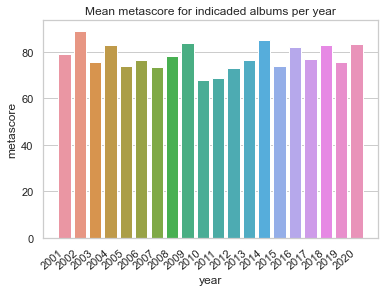

In [20]:
grammy_albums_mean_year = grammy_albums_merged.groupby(["year"]).mean().reset_index()

plt.figure()  # 1
ax = sns.barplot(x="year", y="metascore", data=grammy_albums_mean_year)
ax.set_title("Mean metascore for indicaded albums per year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.plot()
plt.show()

# Nota do metacritic dos vencedores do Grammy por ano

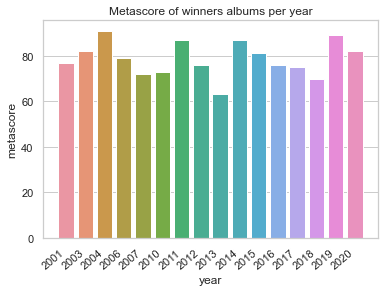

In [21]:
# graph 02
grammy_albums_winners = grammy_albums_merged.loc[grammy_albums_merged["won"] == 1]

plt.figure()  # 2
bx = sns.barplot(x="year", y="metascore", data=grammy_albums_winners)
bx.set_title("Metascore of winners albums per year")
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")

plt.plot()
plt.show()

# Colocação na billboard

1. Colocação na billboard ao longo dos anos dos álbums vencedores do grammy 
2. Colocação na billboard do álbum com melhor review do ano no metacritic

     year_x  won                                     album  \
0      2000    1                              supernatural   
5      2001    1                        two against nature   
19     2003    1                         come away with me   
20     2003    1                         come away with me   
21     2003    1                         come away with me   
36     2004    1               speakerboxxx/the love below   
37     2004    1               speakerboxxx/the love below   
45     2005    1                      genius loves company   
46     2005    1                      genius loves company   
55     2006    1           how to dismantle an atomic bomb   
62     2007    1                       taking the long way   
63     2007    1                       taking the long way   
81     2009    1                              raising sand   
82     2009    1                              raising sand   
91     2010    1                                  fearless   
92     2

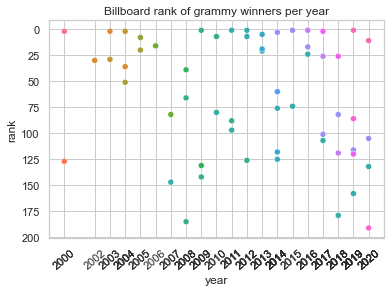

In [27]:
# ----------------------------------------------------------------------------------------
# graph 3.1 - NOT READY
billboard_albums_path = get_filename_billboard_data_all_years("csv")
billboard_albums = pd.read_csv(
    billboard_albums_path, encoding="utf-8", sep=CSV_SEP, quotechar=CSV_QUOTE
)
billboard_albums["album"] = billboard_albums["album"].str.lower()
grammy_billboard_merged = pd.merge(grammy_albums_of_the_year, billboard_albums, on="album")
grammy_billboard_merged = grammy_billboard_merged.drop(columns=["artist_x", "link_img"])
grammy_billboard_merged = grammy_billboard_merged.rename(
    columns={"artist_y": "artist", "year_y": "year"}
)
grammy_billboard_winners = grammy_billboard_merged.loc[grammy_billboard_merged["won"] == 1]
# grammy_billboard_winners = grammy_billboard_winners.loc[grammy_billboard_winners["album"] == "come away with me"]
# grammy_billboard_winners = grammy_billboard_winners.drop(
#     grammy_billboard_winners[grammy_billboard_winners.year_x != grammy_billboard_winners.year].index)

plt.figure()  # 3.1 - NOT READY
bx = sns.scatterplot(x="year", y="rank", hue="album", data=grammy_billboard_winners)
bx.set(xticks=grammy_billboard_winners.year.values)
bx.tick_params(axis='x', rotation=40)
bx.invert_yaxis()
bx.legend_.remove() #find a way to show name albums without plot over the graph
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
bx.set_title("Billboard rank of grammy winners per year")

plt.plot()
plt.show()

C:\Users\WAINEJ~1\AppData\Local\Temp/ipykernel_4404/4241108822.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metacritic_best_review["album"] = metacritic_best_review["album"].str.lower()


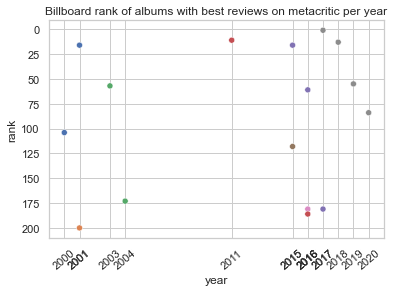

In [23]:

# ----------------------------------------------------------------------------------------
# graph 3.2 - NOT READY
billboard_albums_path = get_filename_billboard_data_all_years("csv")
billboard_albums = pd.read_csv(
    billboard_albums_path, encoding="utf-8", sep=CSV_SEP, quotechar=CSV_QUOTE
)
billboard_albums["album"] = billboard_albums["album"].str.lower()

metacritic_albums_path = get_filename_metacritic_data_all_years("csv")
metacritic_albums = pd.read_csv(
    metacritic_albums_path, encoding="utf-8", sep=CSV_SEP, quotechar=CSV_QUOTE
)
metacritic_albums['year'] = pd.DatetimeIndex(metacritic_albums['release_date']).year
idx = metacritic_albums.groupby(['year'])['metascore'].transform(max) == metacritic_albums['metascore']
metacritic_best_review = metacritic_albums[idx]

metacritic_best_review["album"] = metacritic_best_review["album"].str.lower()
result_albums_bool = billboard_albums.album.isin(metacritic_best_review.album)
result_albums = billboard_albums[result_albums_bool]


plt.figure()  # 3.2 - NOT READY
bx = sns.scatterplot(x="year", y="rank", hue="album", data=result_albums)
bx.set(xticks=result_albums.year.values)
bx.tick_params(axis='x', rotation=40)
bx.invert_yaxis()
bx.legend_.remove()  # find a way to show name albums without plot over the graph
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
bx.set_title("Billboard rank of albums with best reviews on metacritic per year")

plt.plot()
plt.show()

# Número de indicações ao Grammy por artistas

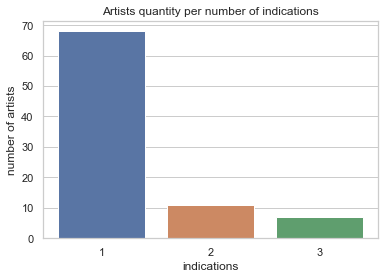

In [24]:
grammy_indicated_artists = grammy_albums_of_the_year.groupby(["artist"]).count().reset_index()
indication_df = grammy_indicated_artists["year"].value_counts()
indication_df = indication_df.to_frame()

plt.figure()  # 4 - NOT READY
cx = sns.barplot(x=indication_df.index, y="year", data=indication_df)
cx.set_title("Artists quantity per number of indications")
cx.set(xlabel="indications", ylabel="number of artists")

plt.plot()
plt.show()